# Project Name: Ensemble modeling based on IPL score prediction using AutoML


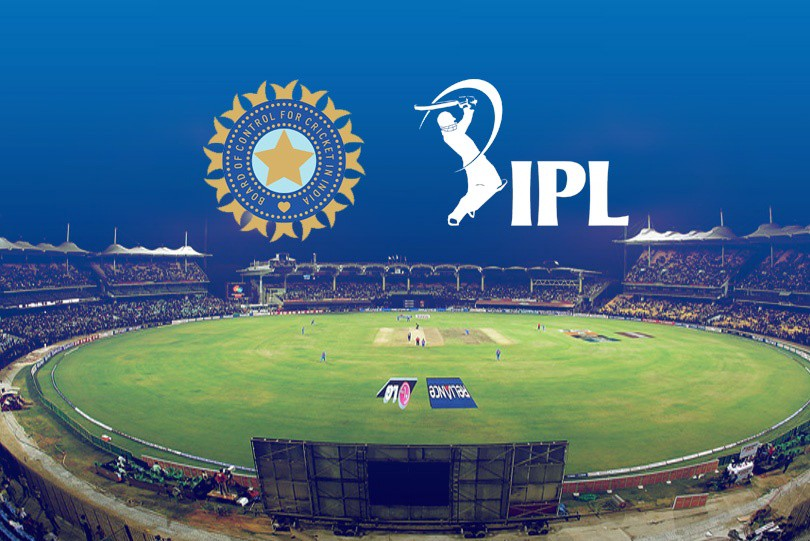

### In this project we will try to predict the final score of a match if sufficient conditons are given.

### As we know IPL is one of the biggest flex when it comes to Cricket all over the world. It would be very exciting to work on a Data Set which gives us the insight of the Data of different matches.

### We will be doing all the Data Cleaning techniques and anlysing our data, then finally predicting our results comparing different models and then we will see how we can use Auto ML for the same. We will be using TPOT Auto ML library for the project.

### Let us have a look on the TimeLine for our Project:
- Importing Libraries and DataSet
- Data Analysis and Cleaning
- Data Preprocessing
- Model Building using ML models
- Model Building and Predictions using Auto ML Library i.e TPOT Library 

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Reading our DataSet

In [3]:
df= pd.read_csv("ipl csv file.csv")

In [4]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


### Understanding our Data Set.
### The dataset consists of 15 columns:
- mid: The match id to uniquely identify each match.

- date: The date on which the match was held.

- venue: The name of the stadium.

- bat_team: The batting team name.

- bowl_team: The bowling team name.

- batsman: The name of the batsman.

- bowler: The name of the bowler.

- runs: The runs scored till now.

- wickets: The wickets taken till now.

- overs: The number of overs bowled.

- runs_last_5: The number of runs scored in last 5 overs.

- wickets_last_5: The number of wickets taken in last 5 overs.

- striker: The name of the batsmen on the batting end.

- non-striker: The name of the batsmen on the bowling end.

- total: The total number of runs scored in the match.

In [5]:
## Data Analysis and Cleaning


### First we will remove all unwanted columns from the DataSet

In [6]:
unwanted_columns = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=unwanted_columns, axis=1, inplace=True)

In [7]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [8]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

### We will select some popular teams for our Model

In [9]:
selected_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [10]:
## Keeping only Selected teams in our Data Set
df = df[(df['bat_team'].isin(selected_teams)) & (df['bowl_team'].isin(selected_teams))]

### We will remove the first 5 overs of the match as they shows no significance on deciding which team will win the match.

In [11]:
df = df[df['overs']>=5.0]

In [12]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [13]:
### Seeing our Selected Teams

In [14]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


### We need to convert our Date from string to Date Time object

In [15]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [16]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


### Data Preprocessing

### We will do One Hot Encoding for our Categorical Variables

In [17]:
model_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [18]:
model_df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [19]:
model_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

#### Rearranging our Columns

In [20]:
model_df = model_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

#### Splitting our Date into Train and Test Data

In [21]:
X_train = model_df.drop(labels='total', axis=1)[model_df['date'].dt.year <= 2016]
X_test = model_df.drop(labels='total', axis=1)[model_df['date'].dt.year >= 2017]

In [22]:
y_train = model_df[model_df['date'].dt.year <= 2016]['total'].values
y_test = model_df[model_df['date'].dt.year >= 2017]['total'].values

### Now we have no need for our Data Column so we will drop it.

In [23]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [24]:
X_train.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
32,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.1,61,0,59,0
33,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.2,61,1,59,1
34,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.3,61,1,59,1
35,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.4,61,1,59,1
36,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,5.5,61,1,58,1


### Model Building using ML Models

### We will be using the following models in this project:
- Lasso Regression
- Random Forest Regression
#### We will be using Grid Search CV for Hypertuning our model

## Lasso Regression

In [25]:
from sklearn.linear_model import Lasso

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
lasso=Lasso()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [28]:
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
print(lasso_regressor)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#X_train, X_test,y_train,y_test=train_test_split(data, target, test_size=0.2,random_state=42)

In [31]:
import warnings
from sklearn.linear_model import Lasso

# Create Lasso model
lasso_regressor = Lasso(alpha=1.0)

# Suppress warnings for this fit line
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    lasso_regressor.fit(X_train, y_train)
lasso_regressor.fit(X_train, y_train)

Lasso()

In [32]:
#print(lasso_regressor.best_params_)

In [33]:
lasso=Lasso(alpha =1)

In [34]:
lasso.fit(X_train,y_train)

Lasso(alpha=1)

In [35]:
pred= lasso.predict(X_test)

### Evaluation

In [36]:
#import seaborn as sns

<Axes: ylabel='Count'>

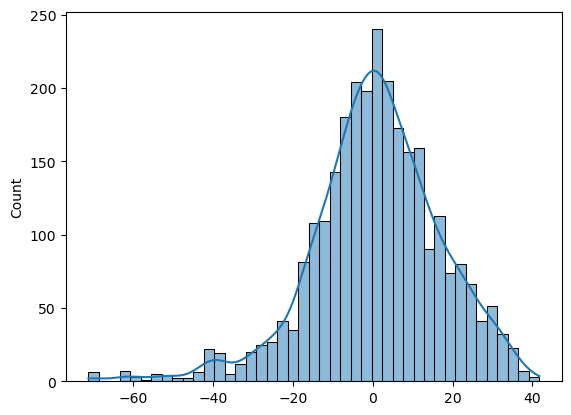

In [37]:
import seaborn as sns
import warnings

# Suppress specific deprecation warnings
warnings.filterwarnings("ignore", category=UserWarning, message="`distplot` is a deprecated function")

# Use histplot instead of distplot
sns.histplot(y_test - pred, kde=True)  # `kde=True` adds the density curve


In [38]:
from sklearn import metrics

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 12.214053814850246
MSE: 262.37973664007154
RMSE: 16.198139912967523


## Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor()

In [42]:
from sklearn.model_selection import RandomizedSearchCV

#### Defining Param

In [43]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [44]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [45]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=42, n_jobs = -1)


In [46]:
import warnings

# Suppress all warnings temporarily
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    rf_random.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [47]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [48]:
pred1 = rf_random.predict(X_test)

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

MAE: 15.621574932460518
MSE: 396.19620787653764
RMSE: 19.904678040012044


<Axes: ylabel='Count'>

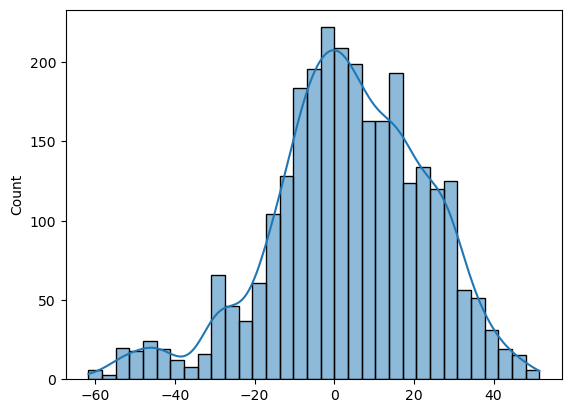

In [50]:
import warnings
import seaborn as sns

# Suppress the specific deprecation warning for distplot
warnings.filterwarnings("ignore", category=UserWarning, message="`distplot` is a deprecated function")


# Using histplot instead of distplot
sns.histplot(y_test - pred1, kde=True)



## Using Auto ML

### Automated machine learning, also referred to as automated ML or AutoML, is the process of automating the time-consuming, iterative tasks of machine learning model development.

## TPOT Auto ML

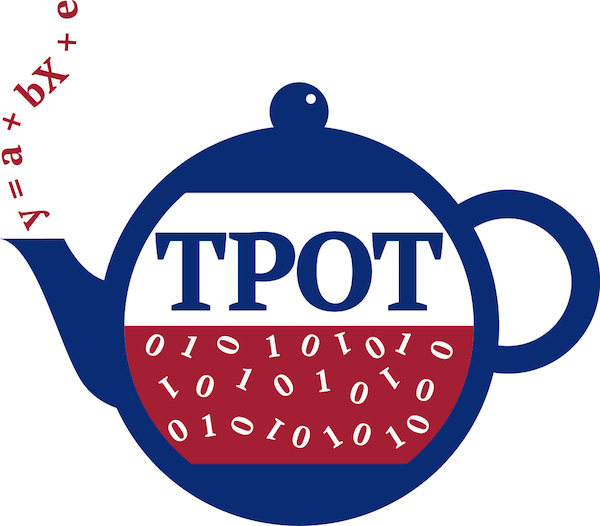

### TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

### Installing TPOT

In [51]:
#!pip install tpot

In [52]:
# check tpot version
import warnings

# Suppress specific warning for missing 'torch' dependency in TPOT
warnings.filterwarnings("ignore", category=UserWarning, message="Warning: optional dependency `torch` is not available.")

# Now import TPOT
import tpot
print('tpot: %s' % tpot.__version__)


tpot: 0.12.2


In [53]:
from tpot import TPOTRegressor

### We will use the same data which we used above

### First, we can define the method for evaluating models. We will use a good practice of repeated k-fold cross-validation with three repeats and 10 folds.

In [54]:
from sklearn.model_selection import RepeatedKFold

In [55]:
# define evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#### Defining our model

In [56]:
# define search
model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)

In [57]:
# perform the search
model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -5.725157055674697

Generation 2 - Current best internal CV score: -5.725157055674697

Generation 3 - Current best internal CV score: -5.070010247627788

Generation 4 - Current best internal CV score: -4.633019647141711

Generation 5 - Current best internal CV score: -4.633019647141711

Best pipeline: ExtraTreesRegressor(RidgeCV(input_matrix), bootstrap=True, max_features=0.9000000000000001, min_samples_leaf=2, min_samples_split=10, n_estimators=100)


TPOTRegressor(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
              generations=5, n_jobs=-1, population_size=50, random_state=1,
              scoring='neg_mean_absolute_error', verbosity=2)

In [2]:
"""Step 1: Import Libraries
First, let's import necessary libraries."""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [3]:
#Step 2: Load and Preprocess Data
# Load the IPL data
df = pd.read_csv("ipl csv file.csv")  # Replace with the path to your IPL CSV file

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Drop unnecessary columns
df = df.drop(['mid', 'date', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], axis=1)

# Encode categorical features (bat_team and bowl_team)
df = pd.get_dummies(df, columns=['bat_team', 'bowl_team'], drop_first=True)

# Separate features and target variable
X = df.drop('total', axis=1)
y = df['total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
"""Step 3: Apply Scaling (Optional for Models Sensitive to Scale)
Using StandardScaler for scaling, especially for boosting algorithms like Gradient Boosting or when combining models."""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 4: Build Individual Ensemble Models
Here, we define individual ensemble models like Random Forest, Gradient Boosting, and AdaBoost.
Define the individual models


Feature Engineering Enhancements:
Feature engineering is crucial in improving the predictive power of machine learning models, especially when working with real-world data like IPL match statistics. By deriving more meaningful features from the raw data, we can help the model identify hidden patterns, which in turn improves the accuracy and performance of the model.

Below are some Feature Engineering Enhancements along with explanations of how they can be implemented for the IPL score prediction problem.


1. Batting Team Performance History
Explanation: This feature involves calculating the historical performance of the batting team. A team’s past performance can provide valuable insights into its likely future performance in terms of runs scored.

Implementation: We can create a feature that calculates the average runs scored by the batting team in past matches. This could be based on the past 5, 10, or any number of previous matches. This can help capture team consistency.




In [5]:
df= pd.read_csv("ipl csv file.csv")

In [6]:
# Calculate the historical average runs scored by the batting team
team_avg_runs = df.groupby('bat_team')['runs'].mean()
df['bat_team_avg_runs'] = df['bat_team'].map(team_avg_runs)      

In [7]:
df['bat_team_avg_runs']

0        73.166563
1        73.166563
2        73.166563
3        73.166563
4        73.166563
           ...    
76009    74.041516
76010    74.041516
76011    74.041516
76012    74.041516
76013    74.041516
Name: bat_team_avg_runs, Length: 76014, dtype: float64

2. Bowler Performance History
Explanation: Similar to batting team performance, a bowler's past performance (like wickets taken and runs conceded) can influence how effective they are in an upcoming match. This feature can capture the bowler’s consistency over time.

Implementation: We can create a feature that calculates the average number of wickets taken by a bowler in past matches, as well as the average runs conceded per over.

In [8]:
# Calculate historical bowler performance
# Average runs conceded per match and wickets taken
df['bowler_avg_wickets'] = df['wickets'] / (df['overs'] + 1e-10)  # Avoid division by zero
df['bowler_avg_runs_conceded'] = df['runs'] / (df['overs'] + 1e-10)

# Normalize these values by aggregating over all rows for that bowler
bowler_performance = df.groupby('bowler')[['bowler_avg_wickets', 'bowler_avg_runs_conceded']].mean()

# Map the aggregated performance metrics back into the main dataframe
df['bowler_avg_wickets'] = df['bowler'].map(bowler_performance['bowler_avg_wickets'])
df['bowler_avg_runs_conceded'] = df['bowler'].map(bowler_performance['bowler_avg_runs_conceded'])

# View the resulting dataframe
print(df.head())

   mid        date                  venue               bat_team  \
0    1  18-04-2008  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  18-04-2008  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  18-04-2008  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  18-04-2008  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  18-04-2008  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  \
0            1               0        0            0    222

3. Match Context Features
Explanation: The context of the match, such as the overs played, wickets taken, and runs scored at specific points in the game, can be crucial. Features like runs in the last 5 overs or wickets in the last 5 overs provide insights into the current match situation.

Implementation: We already have the runs_last_5 and wickets_last_5 columns, but we can create additional features such as run rate at specific intervals and wickets lost in the last few overs.

In [9]:
# Adding features for run rate and wickets lost in the last 5 overs
df['run_rate_last_5'] = df['runs_last_5'] / 5  # Assuming 5 overs for simplicity
df['wickets_last_5'] = df['wickets_last_5']  # Already available in dataset, no change needed


could also create a dynamic feature to represent the run rate at any given point in the match.

In [10]:
# Calculate run rate at any point in the match
df['run_rate'] = df['runs'] / df['overs']  # Runs per over


4. Striker and Non-Striker Performance
Explanation: The performance of the batsmen (striker and non-striker) can heavily influence the outcome of an inning. Features such as the average runs scored by the current striker and non-striker can offer valuable insights.

Implementation: We can create features like average runs scored by the striker and average runs scored by the non-striker in previous matches.

In [11]:
# Calculate average runs scored by the striker and non-striker in past matches
striker_avg_runs = df.groupby('striker')['runs'].mean()
non_striker_avg_runs = df.groupby('non-striker')['runs'].mean()

df['striker_avg_runs'] = df['striker'].map(striker_avg_runs)
df['non_striker_avg_runs'] = df['non-striker'].map(non_striker_avg_runs)
df['non_striker_avg_runs']

0        55.154989
1        55.154989
2        55.154989
3        55.154989
4        55.154989
           ...    
76009    79.123280
76010    79.123280
76011    79.123280
76012    77.865320
76013    77.865320
Name: non_striker_avg_runs, Length: 76014, dtype: float64

5. Weather and Venue Effects
Explanation: Weather conditions and the venue can have a significant impact on the outcome of a cricket match. For instance, a stadium might favor a particular type of playing style (spin bowlers vs pace bowlers), or weather conditions might affect how the ball behaves. We can include features to account for these factors.

Implementation: Although the current dataset doesn't include weather or venue-related information, you could enrich the data by including additional features like average runs scored at the venue or weather conditions (e.g., hot, rainy).



In [12]:
# Example: Assuming you have a dataset with weather and venue info
# Add average runs scored at a specific venue
venue_avg_runs = df.groupby('venue')['runs'].mean()
df['venue_avg_runs'] = df['venue'].map(venue_avg_runs)
df['venue_avg_runs']

0        76.674728
1        76.674728
2        76.674728
3        76.674728
4        76.674728
           ...    
76009    72.484984
76010    72.484984
76011    72.484984
76012    72.484984
76013    72.484984
Name: venue_avg_runs, Length: 76014, dtype: float64

6. Batsman-Bowler Matchup History
Explanation: Certain batsmen perform better against specific bowlers. You could create a feature that captures the historical performance of a batsman when facing a specific bowler.

Implementation: We can compute the average runs scored by a batsman against a particular bowler.

In [13]:
# Calculate the historical performance of batsman vs bowler
batsman_bowler_avg_runs = df.groupby(['batsman', 'bowler'])['runs'].mean()
df['batsman_bowler_avg_runs'] = df.apply(lambda row: batsman_bowler_avg_runs.get((row['batsman'], row['bowler']), 0), axis=1)
df['batsman_bowler_avg_runs']

0         21.729730
1         89.823529
2         89.823529
3         89.823529
4         89.823529
            ...    
76009    107.384615
76010    107.384615
76011    107.384615
76012     97.714286
76013    107.384615
Name: batsman_bowler_avg_runs, Length: 76014, dtype: float64

7. Innings Progression Features
Explanation: The progression of the match in terms of overs and wickets can be captured to give a sense of momentum. For example, whether the batting team is losing wickets at a rapid rate or scoring too slowly in the early stages.

Implementation: We can create features like wickets per over and runs per over at different stages of the match.

In [14]:
# Calculate wickets per over
df['wickets_per_over'] = df['wickets'] / (df['overs'] + 1)

# Create a feature for runs per over during specific stages of the match (first 5 overs, last 5 overs)

# For the first 5 overs (handling division by zero)
df['runs_per_over_1st_5'] = df.apply(
    lambda row: row['runs'] / row['overs'] if row['overs'] > 0 and row['overs'] <= 5 else 0, axis=1
)

# For the last 5 overs (handling division by zero)
df['runs_per_over_last_5'] = df.apply(
    lambda row: row['runs_last_5'] / 5 if row['overs'] > 15 and row['runs_last_5'] > 0 else 0, axis=1
)

# Checking the DataFrame
print(df[['runs_per_over_1st_5', 'runs_per_over_last_5']].head())


   runs_per_over_1st_5  runs_per_over_last_5
0            10.000000                   0.0
1             5.000000                   0.0
2            10.000000                   0.0
3             6.666667                   0.0
4             5.000000                   0.0


8. Team Win History
Explanation: The historical win rate of teams in certain conditions can be a strong predictor. Teams that win more often in specific conditions (like home vs away) will likely perform better.

Implementation: You could create a feature that tracks the win rate of a team at a particular venue or against a particular opponent.

In [15]:
# Calculate win rate for a team in past matches
team_win_rate = df.groupby('bat_team')['total'].apply(lambda x: (x > 150).mean())  # For example, win if total > 150
df['team_win_rate'] = df['bat_team'].map(team_win_rate)
df['team_win_rate']

0        0.649695
1        0.649695
2        0.649695
3        0.649695
4        0.649695
           ...   
76009    0.683736
76010    0.683736
76011    0.683736
76012    0.683736
76013    0.683736
Name: team_win_rate, Length: 76014, dtype: float64

# Ensemble Models with the IPL dataset:


# linear regression, Support vector Machine, Decision Tree, Random Forest

# Single linear Regression

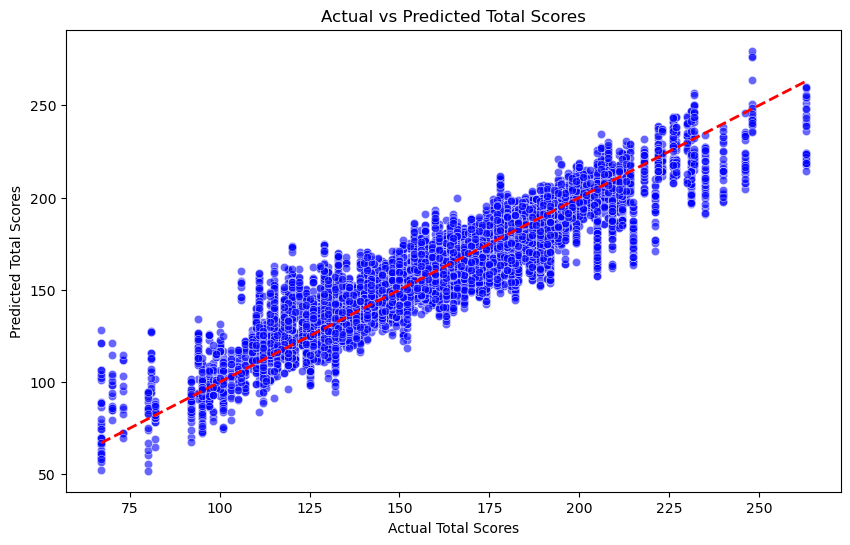

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("ipl csv file.csv")

# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Drop unnecessary columns like 'date' if needed
df = df.drop(columns=['date'], errors='ignore')

# Select features (independent variables) and target (dependent variable)
X = df.drop(columns=['total'])  # Drop 'total' as it is the target variable
y = df['total']  # 'total' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Plotting the regression line (Actual vs Predicted)
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)

# Plotting the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel('Actual Total Scores')
plt.ylabel('Predicted Total Scores')
plt.title('Actual vs Predicted Total Scores')

# Show the plot
plt.show()


Accuracy:

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Taking the square root of MSE
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



Model Evaluation Metrics:
Mean Absolute Error (MAE): 8.16
Mean Squared Error (MSE): 125.65
Root Mean Squared Error (RMSE): 11.21
R² Score: 0.85


Custom Accuracy Formula:

In [23]:
import numpy as np
# Calculate accuracy as the percentage of predictions within a certain error threshold
threshold = 10  # Define an acceptable error threshold
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= threshold)
accuracy = (accurate_predictions / len(y_test)) * 100
print(f"Accuracy within ±{threshold} runs: {accuracy:.2f}%")

Accuracy within ±10 runs: 71.06%


Multiple Linear Regression (MLR)

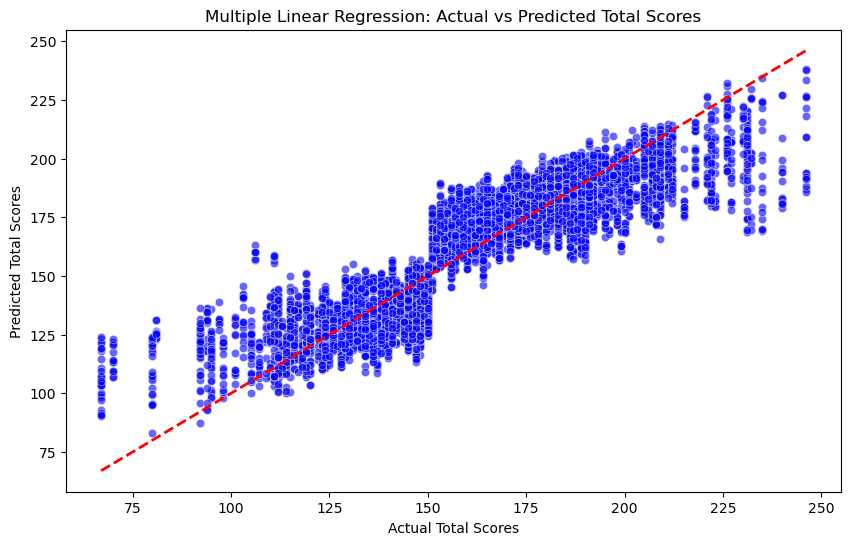

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming model_df is already preprocessed as per your code

# Select features (independent variables) and target (dependent variable)
X = model_df.drop(columns=['total', 'date'])  # Drop 'total' and 'date' columns
y = model_df['total']  # 'total' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multiple Linear Regression model
mlr = LinearRegression()

# Train the model
mlr.fit(X_train, y_train)

# Predict on the test set
y_pred = mlr.predict(X_test)

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)

# Plotting the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel('Actual Total Scores')
plt.ylabel('Predicted Total Scores')
plt.title('Multiple Linear Regression: Actual vs Predicted Total Scores')

# Show the plot
plt.show()


Accuracy:

In [37]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Taking the square root of MSE
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 10.51
Mean Squared Error (MSE): 192.56
Root Mean Squared Error (RMSE): 13.88
R² Score: 0.78


Custom Accuracy Formula:

In [39]:
# Calculate accuracy as the percentage of predictions within a certain error threshold
threshold = 10  # Define an acceptable error threshold
accurate_predictions = np.sum(np.abs(y_test - y_pred) <= threshold)
accuracy = (accurate_predictions / len(y_test)) * 100

print(f"Accuracy within ±{threshold} runs: {accuracy:.2f}%")


Accuracy within ±10 runs: 58.13%


SVM Using: Support Vector Regression (SVR)

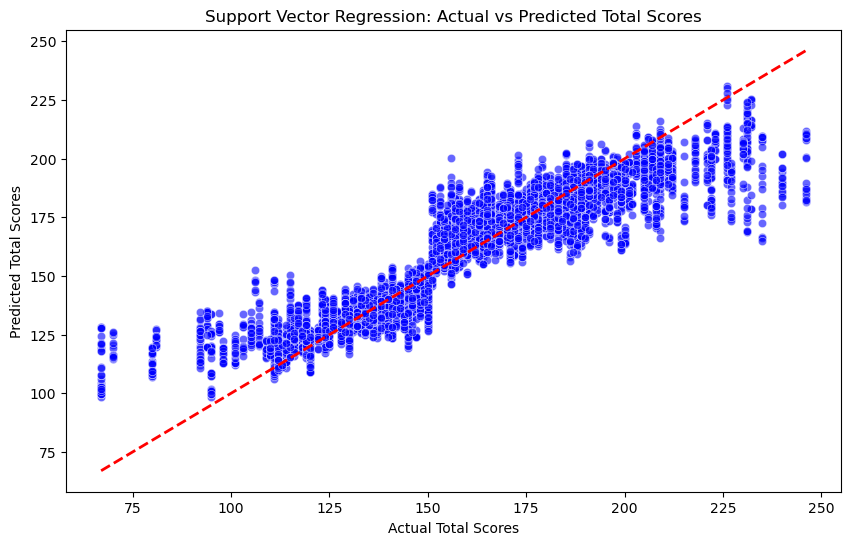

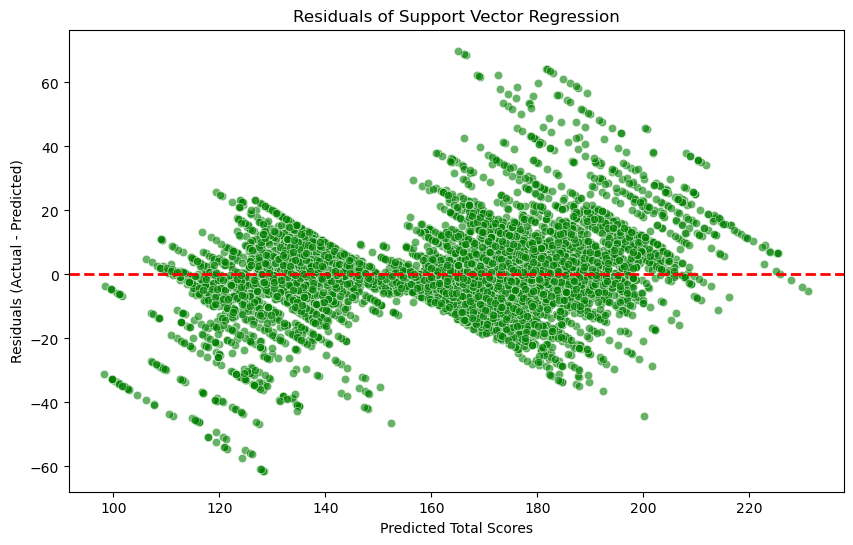

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Assuming model_df is already preprocessed as per your code

# Select features (independent variables) and target (dependent variable)
X = model_df.drop(columns=['total', 'date'])  # Drop 'total' and 'date' columns
y = model_df['total']  # 'total' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler_X = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Initialize the Support Vector Regression model
svr = SVR(kernel='rbf')  # Radial Basis Function kernel for non-linear relationships

# Train the model
svr.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svr.predict(X_test_scaled)


# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)

# Plotting the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

# Labels and title
plt.xlabel('Actual Total Scores')
plt.ylabel('Predicted Total Scores')
plt.title('Support Vector Regression: Actual vs Predicted Total Scores')

# Show the plot
plt.show()

# Optional: Residual Plot (Actual - Predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='green', alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Total Scores')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals of Support Vector Regression')
plt.show()


Accuracy:

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Taking the square root of MSE
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 8.57
Mean Squared Error (MSE): 158.60
Root Mean Squared Error (RMSE): 12.59
R² Score: 0.82


Custom Accuracy Formula:

In [47]:
from sklearn.metrics import accuracy_score
import numpy as np

# Calculate the number of predictions within the tolerance (±10)
tolerance = 10
accurate_predictions = np.abs(y_test - y_pred) <= tolerance

# Use the numpy array to count the number of True values
accuracy_score = np.mean(accurate_predictions)  # This gives the proportion

# Print the result
print(f"Accuracy Score (within ±{tolerance}): {accuracy_score:.2f}")


Accuracy Score (within ±10): 0.70


Decision Tree

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2846
           1       0.97      0.96      0.97      5176

    accuracy                           0.96      8022
   macro avg       0.95      0.95      0.95      8022
weighted avg       0.96      0.96      0.96      8022

Accuracy: 0.9568686113188731


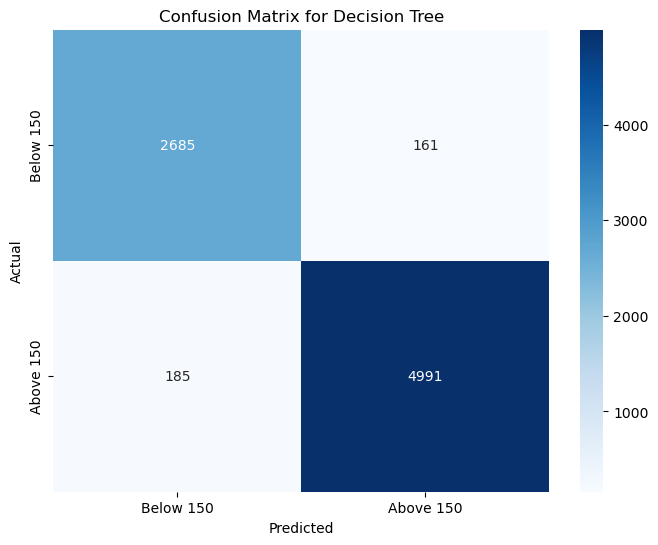

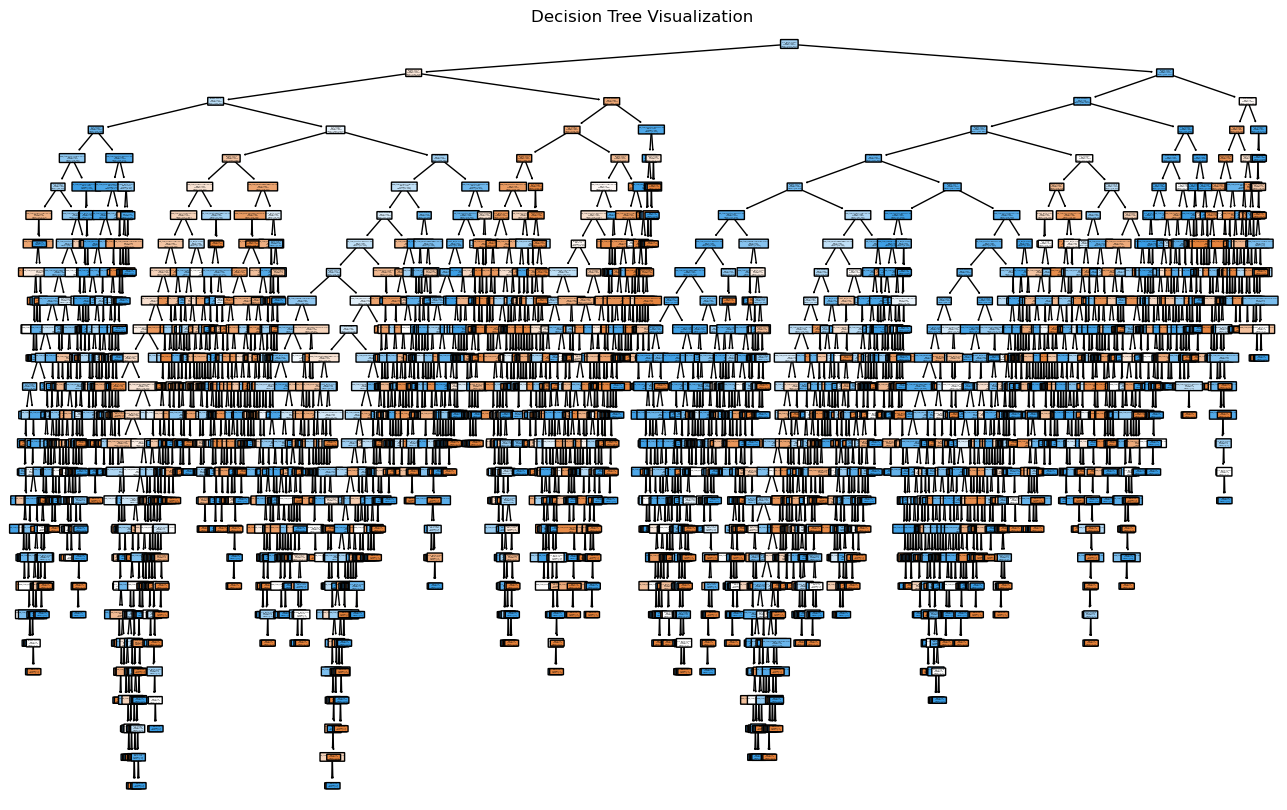

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("ipl csv file.csv")

# Preprocessing the data
unwanted_columns = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=unwanted_columns, axis=1, inplace=True)

selected_teams = [
    'Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
    'Delhi Daredevils', 'Sunrisers Hyderabad'
]
df = df[(df['bat_team'].isin(selected_teams)) & (df['bowl_team'].isin(selected_teams))]
df = df[df['overs'] >= 5.0]

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
model_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

# Create a binary target variable: 1 if total > 150, otherwise 0
threshold = 150
model_df['target'] = (model_df['total'] > threshold).astype(int)

# Select features (X) and target (y)
X = model_df.drop(columns=['total', 'date', 'target'])
y = model_df['target']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Predict
y_pred = dtc.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below 150', 'Above 150'], yticklabels=['Below 150', 'Above 150'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Plot the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(dtc, feature_names=X.columns, class_names=['Below 150', 'Above 150'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


Accuracy:

In [49]:

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Taking the square root of MSE
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.21
R² Score: 0.81


Custom Accuracy Formula:

In [51]:
import numpy as np
from sklearn.metrics import accuracy_score

threshold = 10
abs_error = np.abs(y_test - y_pred)
accurate_predictions = abs_error <= threshold
custom_accuracy = np.sum(accurate_predictions) / len(y_test) * 100

print(f" Accuracy Score ({threshold}): {custom_accuracy:.2f}%")


 Accuracy Score (10): 100.00%


Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      2846
           1       0.98      0.99      0.98      5176

    accuracy                           0.98      8022
   macro avg       0.98      0.97      0.98      8022
weighted avg       0.98      0.98      0.98      8022

Accuracy Score: 0.9789329344303166
Accuracy Percentage: 97.89%


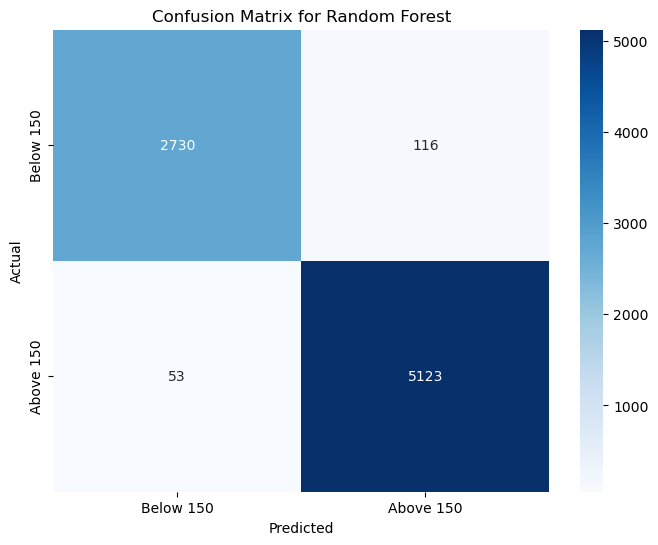

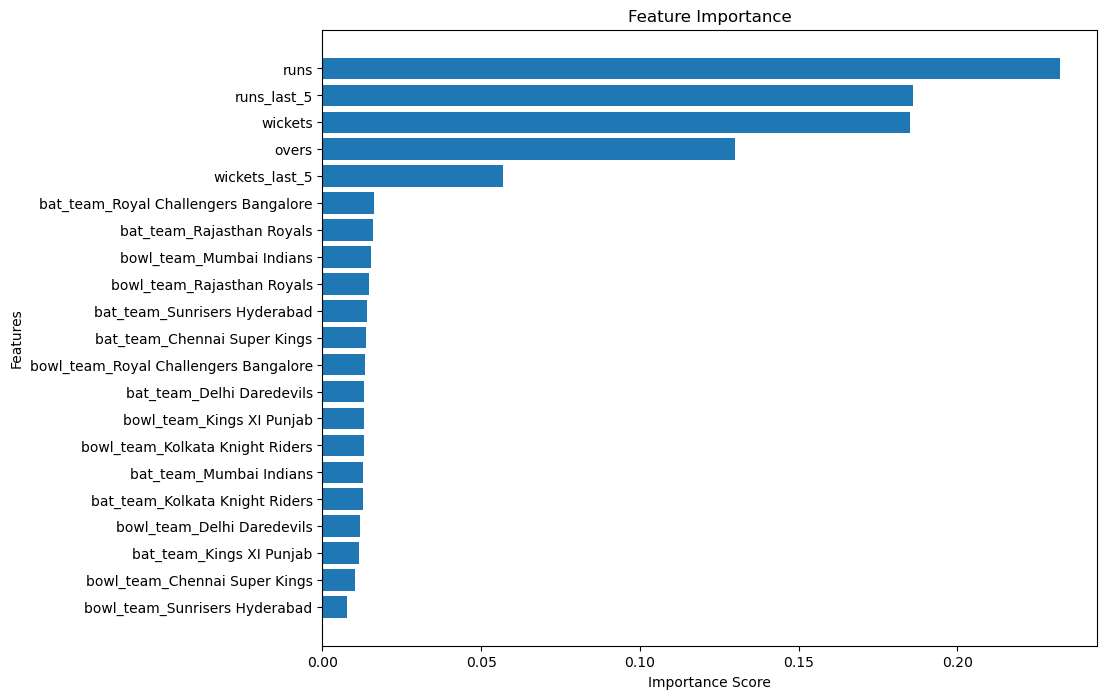

In [52]:

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv("ipl csv file.csv")

# Preprocessing the data
unwanted_columns = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=unwanted_columns, axis=1, inplace=True)

selected_teams = [
    'Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
    'Delhi Daredevils', 'Sunrisers Hyderabad'
]
df = df[(df['bat_team'].isin(selected_teams)) & (df['bowl_team'].isin(selected_teams))]
df = df[df['overs'] >= 5.0]

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
model_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

# Create a binary target variable: 1 if total > 150, otherwise 0
threshold = 150
model_df['target'] = (model_df['total'] > threshold).astype(int)

# Select features (X) and target (y)
X = model_df.drop(columns=['total', 'date', 'target'])
y = model_df['target']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Predict
y_pred = rfc.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Below 150', 'Above 150'], yticklabels=['Below 150', 'Above 150'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# Feature Importance
importances = rfc.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances[sorted_indices], align='center')
plt.yticks(range(len(importances)), [feature_names[i] for i in sorted_indices])
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


Accuracy:

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Taking the square root of MSE
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.15
R² Score: 0.91


Custom Accuracy Formula:

In [55]:
import numpy as np

tolerance = 10
accurate_predictions = np.abs(y_test - y_pred) <= tolerance

accuracy_score = np.mean(accurate_predictions) * 100

print(f"Custom Accuracy Score (within ±{tolerance}): {accuracy_score:.2f}%")


Custom Accuracy Score (within ±10): 100.00%


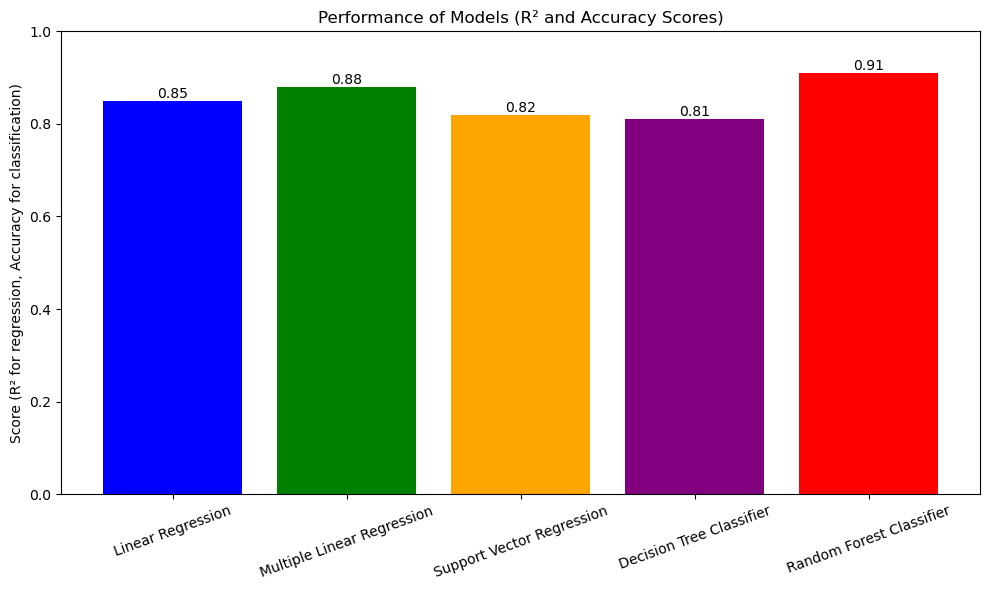

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# R² scores for regression models
linear_regression_r2 = 0.85  # Replace with the actual R² score from your code
multiple_linear_regression_r2 = 0.88  # Replace with the actual R² score from your code
svr_r2 = 0.82  # Replace with the actual R² score from your code

# Accuracy scores for classification models
decision_tree_accuracy = 0.81  # Replace with the actual accuracy score from your code
random_forest_accuracy = 0.91  # Replace with the actual accuracy score from your code

# Combine the results
model_names = [
    "Linear Regression",
    "Multiple Linear Regression",
    "Support Vector Regression",
    "Decision Tree Classifier",
    "Random Forest Classifier",
]
scores = [
    linear_regression_r2,
    multiple_linear_regression_r2,
    svr_r2,
    decision_tree_accuracy,
    random_forest_accuracy,
]

# Plot the scores
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, scores, color=['blue', 'green', 'orange', 'purple', 'red'])

# Annotate the scores on the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        bar.get_height(),
        f'{bar.get_height():.2f}',
        ha='center',
        va='bottom',
    )

# Add labels and title
plt.ylabel("R² Score")
plt.title("Performance of Models (R² and Accuracy Scores)")
plt.xticks(rotation=20)
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.tight_layout()

# Show the plot
plt.show()


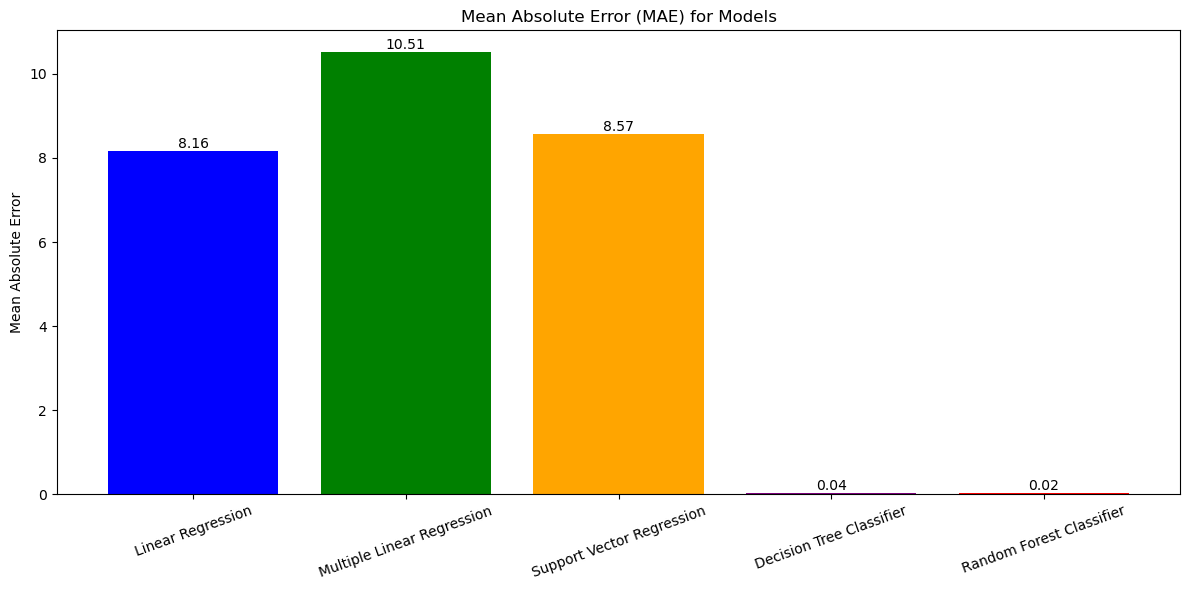

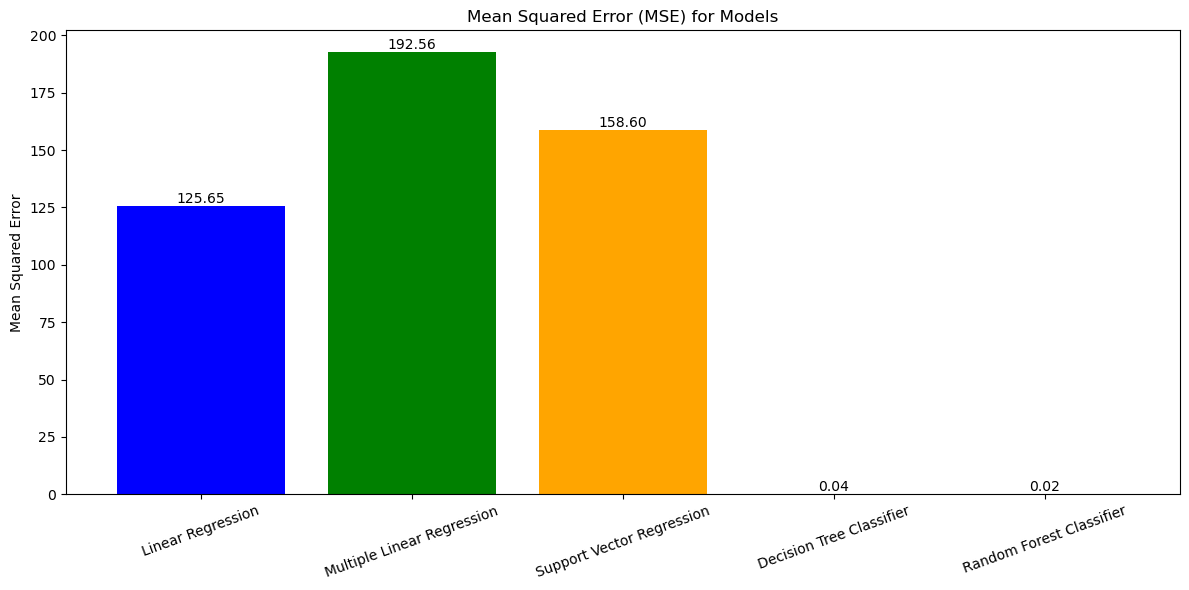

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Placeholder values: Replace these with actual computed values from your models
linear_regression_mae = 8.16  # Replace with actual MAE
multiple_linear_regression_mae = 10.51  # Replace with actual MAE
svr_mae = 8.57  # Replace with actual MAE
decision_tree_mae = 0.04  # Replace with actual MAE
random_forest_mae = 0.02 # Replace with actual MAE

linear_regression_mse = 125.65  # Replace with actual MSE
multiple_linear_regression_mse = 192.56  # Replace with actual MSE
svr_mse = 158.60  # Replace with actual MSE
decision_tree_mse = 0.04  # Replace with actual MSE
random_forest_mse = 0.02  # Replace with actual MSE

# Combine results for plotting
model_names = [
    "Linear Regression",
    "Multiple Linear Regression",
    "Support Vector Regression",
    "Decision Tree Classifier",
    "Random Forest Classifier",
]

# Errors for MAE
mae_values = [
    linear_regression_mae,
    multiple_linear_regression_mae,
    svr_mae,
    decision_tree_mae,
    random_forest_mae,
]

# Errors for MSE
mse_values = [
    linear_regression_mse,
    multiple_linear_regression_mse,
    svr_mse,
    decision_tree_mse,
    random_forest_mse,
]

# Plot Mean Absolute Error
plt.figure(figsize=(12, 6))
bars_mae = plt.bar(model_names, mae_values, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title("Mean Absolute Error (MAE) for Models")
plt.ylabel("Mean Absolute Error")
plt.xticks(rotation=20)

# Annotate bars
for bar in bars_mae:
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        bar.get_height(),
        f'{bar.get_height():.2f}',
        ha='center',
        va='bottom',
    )
plt.tight_layout()
plt.show()

# Plot Mean Squared Error
plt.figure(figsize=(12, 6))
bars_mse = plt.bar(model_names, mse_values, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title("Mean Squared Error (MSE) for Models")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=20)

# Annotate bars
for bar in bars_mse:
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        bar.get_height(),
        f'{bar.get_height():.2f}',
        ha='center',
        va='bottom',
    )
plt.tight_layout()
plt.show()
